# Convolutional Neural Network

### Importing the libraries

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

tf.random.set_seed(100)

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [45]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.1,
    rotation_range=20
)

training_set = train_datagen.flow_from_directory(
    'dataset/training_set',  
    target_size=(64, 64),  # Resize all images to 64*64 pixels
    batch_size=32,         # Number of images per batch
    class_mode='binary'    # cat or dog
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [46]:
test_datagen = ImageDataGenerator(rescale=1./255) 

test_set = test_datagen.flow_from_directory(
    'dataset/test_set',    
    target_size=(64, 64),  
    batch_size=32,         
    class_mode='binary' 
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [47]:
model = Sequential()

### Step 1 - Convolution

In [48]:
model.add(Conv2D(
    filters=64,              
    kernel_size=(3, 3),      
    activation='relu',       
    input_shape=(64, 64, 3),
    padding='same'  
))

### Step 2 - Pooling

In [49]:
model.add(MaxPooling2D(
    pool_size=(2, 2)  # 2x2 pooling window
))

### Adding a second convolutional layer

In [50]:
model.add(Conv2D(128, (3, 3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

### Step 3 - Flattening

In [51]:
model.add(Flatten())

### Step 4 - Full Connection

In [52]:
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.4))

### Step 5 - Output Layer

In [53]:
model.add(Dense(
    units=1,           
    activation='sigmoid' 
))

## Part 3 - Training the CNN

### Compiling the CNN

In [54]:
model.compile(
    optimizer='adam',           
    loss='binary_crossentropy', 
    metrics=['accuracy']       
)

### Training the CNN on the Training set and evaluating it on the Test set

In [55]:
history = model.fit(
    training_set,              
    steps_per_epoch=250,       
    epochs=30,                
    validation_data=test_set,  
    validation_steps=63        
)

Epoch 1/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.5102 - loss: 0.7651 - val_accuracy: 0.5795 - val_loss: 0.6841
Epoch 2/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 45us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.6397 - loss: 0.6479 - val_accuracy: 0.6940 - val_loss: 0.5888
Epoch 4/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.6859 - loss: 0.5844 - val_accuracy: 0.7105 - val_loss: 0.5663
Epoch 6/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.7037 - loss: 0.5639 - val_accuracy: 0.7330 - val_loss: 0.5319
Epoch 8/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/30
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.7276 - loss: 0.5419 - val_accura

## Part 4 - Making a single prediction

Testing image 1:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


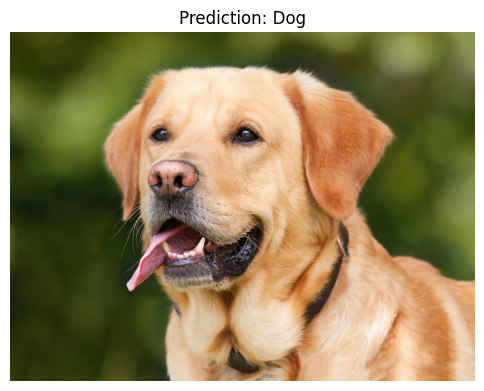

Model predicts: Dog

Testing image 2:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


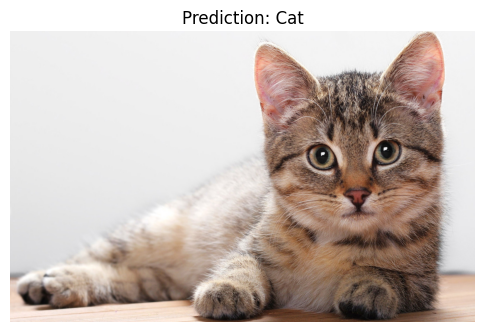

Model predicts: Cat


In [57]:

def predict_single_image(image_path):
    # Load and preprocess image
    test_image = image.load_img(
        image_path, 
        target_size=(64, 64) 
    )
    
    # Convert to array and add batch dimension
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    
    # Normalize pixel values
    test_image = test_image / 255.
    
    # Make prediction
    result = model.predict(test_image)
    
    # Display image with prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(image.load_img(image_path))
    plt.title(f'Prediction: {"Dog" if result[0] > 0.5 else "Cat"}')
    plt.axis('off')
    plt.show()
    
    return "Dog" if result[0] > 0.5 else "Cat"

# Test with sample images
print("Testing image 1:")
result1 = predict_single_image('dataset/single_prediction/cat_or_dog_1.jpg')
print(f"Model predicts: {result1}")

print("\nTesting image 2:")
result2 = predict_single_image('dataset/single_prediction/cat_or_dog_2.jpg')
print(f"Model predicts: {result2}")